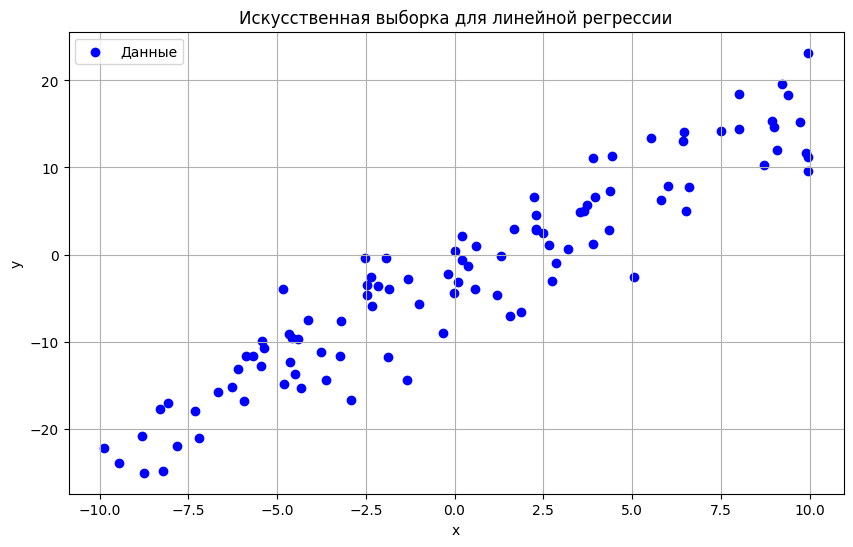

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Параметры генерации данных
m = 100  # Размер выборки
min_value = -10
max_value = 10

# Параметры истинной модели линейной регрессии
true_k0 = 2.0
true_b = -3.0

# Генерация входных данных x (равномерное распределение)
x_data = np.random.uniform(min_value, max_value, m)

# Генерация шума N (нормальное распределение)
noise = np.random.normal(0, 4, m)  # Стандартное отклонение шума = 4

# Генерация выходных данных y по модели
y_data = true_k0 * x_data + true_b + noise

# Визуализация данных
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Данные', color='blue')
plt.title('Искусственная выборка для линейной регрессии')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Эпоха 0: Потеря = 224.1907, k0 = -0.6883, b = -1.3260
Эпоха 1000: Потеря = 79.6029, k0 = 0.4960, b = -1.3465
Эпоха 2000: Потеря = 35.8785, k0 = 1.1469, b = -1.3712
Эпоха 3000: Потеря = 22.6138, k0 = 1.5047, b = -1.3979
Эпоха 4000: Потеря = 18.5492, k0 = 1.7014, b = -1.4255
Эпоха 5000: Потеря = 17.2652, k0 = 1.8096, b = -1.4532
Эпоха 6000: Потеря = 16.8230, k0 = 1.8692, b = -1.4809
Эпоха 7000: Потеря = 16.6371, k0 = 1.9021, b = -1.5082
Эпоха 8000: Потеря = 16.5307, k0 = 1.9202, b = -1.5351
Эпоха 9000: Потеря = 16.4503, k0 = 1.9303, b = -1.5616

Итоговые параметры модели:
k0 = 1.9359
b = -1.5875


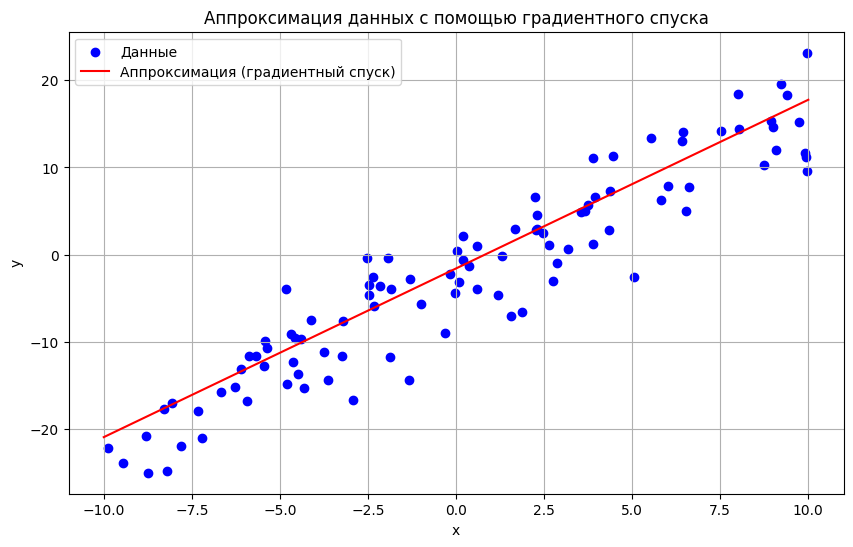

In [4]:
# Перевод данных в тензоры TensorFlow
X = tf.constant(x_data, dtype=tf.float32)
Y = tf.constant(y_data, dtype=tf.float32)

# Инициализация параметров модели (k0, b) случайными значениями
k0 = tf.Variable(np.random.randn(), dtype=tf.float32)
b = tf.Variable(np.random.randn(), dtype=tf.float32)

# Гиперпараметры
learning_rate = 1e-5
epochs = 10000

# Функция потерь (среднеквадратичная ошибка)
def loss_fn():
    y_pred = k0 * X + b
    return tf.reduce_mean(tf.square(Y - y_pred))

# Оптимизатор градиентного спуска
optimizer = tf.optimizers.SGD(learning_rate=learning_rate)

# Списки для отслеживания потерь
loss_history = []

# Тренировочный цикл
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        loss = loss_fn()
    gradients = tape.gradient(loss, [k0, b])
    optimizer.apply_gradients(zip(gradients, [k0, b]))
    
    # Сохранение истории потерь
    loss_history.append(loss.numpy())
    
    # Периодический вывод информации
    if epoch % 1000 == 0:
        print(f"Эпоха {epoch}: Потеря = {loss.numpy():.4f}, k0 = {k0.numpy():.4f}, b = {b.numpy():.4f}")

# Итоговые параметры
print("\nИтоговые параметры модели:")
print(f"k0 = {k0.numpy():.4f}")
print(f"b = {b.numpy():.4f}")

# Визуализация аппроксимированной модели
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Данные', color='blue')
# Создание плотной сетки для плавного графика аппроксимации
x_plot = np.linspace(min_value, max_value, 1000)
y_plot = k0.numpy() * x_plot + b.numpy()
plt.plot(x_plot, y_plot, label='Аппроксимация (градиентный спуск)', color='red')
plt.title('Аппроксимация данных с помощью градиентного спуска')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
